In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#Create a Model Class that inherites nn.Module
class Model(nn.Module):
    #Input layer (17 features)
    def __init__(self, in_features=17, h1=1000, h2=1000, h3=1000, out_features=1):
        super().__init__()
        #fully connecting all neurons
        #2 hidden layers with 64 neurons per layer
        self.fc1 = nn.Linear(in_features, h1) 
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #if output is less than zero then output is zero
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)  
        return x

In [4]:
torch.manual_seed(10) #manual seed for randomization
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

my_df= pd.read_csv('balanced_data.csv')


In [7]:
my_df

,Has_Diabetes,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,1,1,1,1,3004.0,1,0,0,0.0,1,1.0,0,3.0,10.0,0,0,10.0,1.0
1,0,1,1,0,3000.0,1,0,0,0.0,1,2.0,0,3.0,1.0,0,0,12.0,1.0
2,1,1,1,1,4135.0,1,0,1,30.0,0,3.0,0,5.0,0.0,1,1,5.0,1.0
3,1,1,1,1,2734.0,1,0,1,30.0,1,1.0,0,4.0,0.0,1,0,9.0,1.0
4,1,1,1,1,2215.0,1,0,0,26.0,1,1.0,0,4.0,0.0,0,0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0,0,1,0,2554.0,0,0,0,0.0,1,2.0,0,1.0,0.0,0,0,8.0,8.0
25996,0,0,1,1,3487.0,1,0,0,0.0,1,2.0,0,2.0,0.0,0,1,8.0,8.0
25997,0,0,1,0,4001.0,0,0,0,3.0,1,2.0,0,2.0,0.0,0,1,8.0,8.0
25998,0,0,1,0,2585.0,1,0,0,0.0,1,4.0,1,3.0,0.0,0,1,3.0,8.0


In [8]:
# Convert boolean columns to integers (True -> 1, False -> 0)
bool_columns = ['High_BP', 'Checked_Cho','Told_High_Cho', 'Smoker', 'Stroke', 'Heart_Attack', 'Recent_Exercise', '5_or_More_Drinks', 'Diff_Walking', 'Sex']
for col in bool_columns:
    my_df[col] = my_df[col].astype(int)

In [9]:
#Train test and splid data
X = my_df.drop('Has_Diabetes', axis=1)
Y = my_df['Has_Diabetes']
X #print

,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,1,1,1,3004.0,1,0,0,0.0,1,1.0,0,3.0,10.0,0,0,10.0,1.0
1,1,1,0,3000.0,1,0,0,0.0,1,2.0,0,3.0,1.0,0,0,12.0,1.0
2,1,1,1,4135.0,1,0,1,30.0,0,3.0,0,5.0,0.0,1,1,5.0,1.0
3,1,1,1,2734.0,1,0,1,30.0,1,1.0,0,4.0,0.0,1,0,9.0,1.0
4,1,1,1,2215.0,1,0,0,26.0,1,1.0,0,4.0,0.0,0,0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0,1,0,2554.0,0,0,0,0.0,1,2.0,0,1.0,0.0,0,0,8.0,8.0
25996,0,1,1,3487.0,1,0,0,0.0,1,2.0,0,2.0,0.0,0,1,8.0,8.0
25997,0,1,0,4001.0,0,0,0,3.0,1,2.0,0,2.0,0.0,0,1,8.0,8.0
25998,0,1,0,2585.0,1,0,0,0.0,1,4.0,1,3.0,0.0,0,1,3.0,8.0


In [10]:
STANDARDISE_COLUMNS = ["BMI", "Physical_Health", "Avg_Drink", "5_or_More_Drinks", "Gen_Health", "Mental_Health", "Age", "Income"]

X[STANDARDISE_COLUMNS] = (X[STANDARDISE_COLUMNS] - X[STANDARDISE_COLUMNS].mean(axis=0)) / X[STANDARDISE_COLUMNS].std(axis=0)
X

,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,1,1,1,0.150128,1,0,0,-0.492629,1,-0.483058,-0.256022,0.371601,0.923577,0,0,0.611122,-2.784923
1,1,1,0,0.143923,1,0,0,-0.492629,1,-0.004819,-0.256022,0.371601,-0.302056,0,0,1.288627,-2.784923
2,1,1,1,1.904721,1,0,1,2.981828,0,0.473420,-0.256022,2.283088,-0.438237,1,1,-1.082639,-2.784923
3,1,1,1,-0.268740,1,0,1,2.981828,1,-0.483058,-0.256022,1.327344,-0.438237,1,0,0.272370,-2.784923
4,1,1,1,-1.073898,1,0,0,2.518567,1,-0.483058,-0.256022,1.327344,-0.438237,0,0,0.272370,-2.784923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0,1,0,-0.547985,0,0,0,-0.492629,1,-0.004819,-0.256022,-1.539887,-0.438237,0,0,-0.066382,0.852886
25996,0,1,1,0.899437,1,0,0,-0.492629,1,-0.004819,-0.256022,-0.584143,-0.438237,0,1,-0.066382,0.852886
25997,0,1,0,1.696838,0,0,0,-0.145183,1,-0.004819,-0.256022,-0.584143,-0.438237,0,1,-0.066382,0.852886
25998,0,1,0,-0.499893,1,0,0,-0.492629,1,0.951659,0.046316,0.371601,-0.438237,0,1,-1.760144,0.852886


In [11]:
X.corrwith(Y)

c:\Users\eddie_uooosyh\Documents\Python\EpicVenv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\eddie_uooosyh\Documents\Python\EpicVenv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


High_BP             0.358630
Checked_Cho              NaN
Told_High_Cho       0.277002
BMI                 0.324851
Smoker              0.107950
Stroke              0.083546
Heart_Attack        0.151029
Physical_Health     0.151351
Recent_Exercise    -0.158231
Avg_Drink          -0.018541
5_or_More_Drinks   -0.031990
Gen_Health          0.372122
Mental_Health       0.048539
Diff_Walking        0.202193
Sex                 0.072277
Age                 0.247125
Income             -0.139079
dtype: float64

In [12]:
X = X.values
Y = Y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [15]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [16]:
Y_train.shape

torch.Size([20800])

In [17]:
from sklearn.svm import SVC

m = SVC()
m.fit(X_train, Y_train)

SVC()

In [18]:
y_pred = m.predict(X_test)

In [19]:
import sklearn.metrics

print(sklearn.metrics.accuracy_score(Y_test, y_pred))
sklearn.metrics.confusion_matrix(Y_test, y_pred)

0.7367307692307692


array([[1896,  716],
       [ 653, 1935]], dtype=int64)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
#choose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0008)

In [ ]:
model.parameters #printing parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=17, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=1000, bias=True)
  (out): Linear(in_features=1000, out_features=1, bias=True)
)>

In [35]:
#model training
epochs = 10
losses = []
for i in range(epochs):
    Y_pred = model.forward(X_train) #prediction results
    loss = criterion(Y_pred.squeeze(), Y_train.float()) #comparing predicted to actual results
    losses.append(loss.detach().numpy())
    
    if i % 1 ==0:
        print(f'Epoch: {i} and loss: {loss}')        

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   

Epoch: 0 and loss: 0.5619792938232422
Epoch: 1 and loss: 0.5552796125411987
Epoch: 2 and loss: 0.5502724051475525
Epoch: 3 and loss: 0.5472441911697388
Epoch: 4 and loss: 0.5458269119262695
Epoch: 5 and loss: 0.5449304580688477
Epoch: 6 and loss: 0.5435006618499756
Epoch: 7 and loss: 0.5413325428962708
Epoch: 8 and loss: 0.5389812588691711
Epoch: 9 and loss: 0.5371271371841431


Text(0.5, 0, 'Epoch')

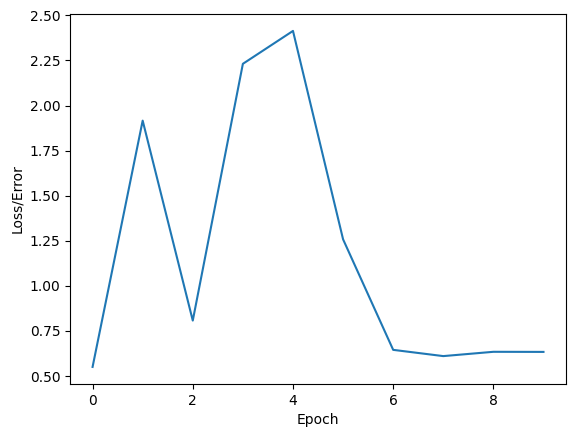

In [31]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [36]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval.squeeze(), Y_test.float())
    

In [37]:
loss

tensor(0.5373)

In [38]:
correct = 0
trues=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
    
        print(f'{i+1}.) {str(y_val)} ')
        
        if y_val.argmax().item() == Y_test[i]:
            correct +=1

        if y_val.argmax().item()==1:
            trues+=1
    
print(f'We got {correct} correct!')
print(f'Trues:{trues}')
print(f'Accuracy is {correct/len(X_test)}')

1.) tensor([1.0706]) 
2.) tensor([0.6545]) 
3.) tensor([-0.7601]) 
4.) tensor([-0.0078]) 
5.) tensor([-1.9510]) 
6.) tensor([0.3801]) 
7.) tensor([1.1477]) 
8.) tensor([-1.8774]) 
9.) tensor([1.0442]) 
10.) tensor([0.3130]) 
11.) tensor([-0.5504]) 
12.) tensor([-2.2538]) 
13.) tensor([-2.0871]) 
14.) tensor([1.0421]) 
15.) tensor([-1.6558]) 
16.) tensor([-0.8717]) 
17.) tensor([2.1441]) 
18.) tensor([-1.1041]) 
19.) tensor([-1.1844]) 
20.) tensor([0.6324]) 
21.) tensor([0.0233]) 
22.) tensor([-0.6388]) 
23.) tensor([2.8156]) 
24.) tensor([2.2625]) 
25.) tensor([-0.0932]) 
26.) tensor([0.4979]) 
27.) tensor([1.7146]) 
28.) tensor([-0.8555]) 
29.) tensor([-1.2833]) 
30.) tensor([-2.0374]) 
31.) tensor([0.2347]) 
32.) tensor([-1.1665]) 
33.) tensor([1.8841]) 
34.) tensor([-0.9665]) 
35.) tensor([0.7885]) 
36.) tensor([0.9235]) 
37.) tensor([1.9673]) 
38.) tensor([-1.8275]) 
39.) tensor([2.0985]) 
40.) tensor([0.7092]) 
41.) tensor([2.2642]) 
42.) tensor([-1.1329]) 
43.) tensor([1.4094]) 


In [39]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for X_test
predictions = []
with torch.no_grad():
    for data in X_test:
        output = model(data)
        predictions.append(output.argmax().item())

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print()

# Print True Positives, True Negatives, False Positives, False Negatives
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")


Confusion Matrix:
[[2612    0]
 [2588    0]]

True Positives: 0
True Negatives: 2612
False Positives: 0
False Negatives: 2588
